In [1]:
import scanpy as sc
import seaborn as sns
import os
import anndata as ad

In [2]:
# 设置参数
sc.settings.verbosity = 4
sc.settings.set_figure_params(
    dpi=80,
    dpi_save=300,
    facecolor="white",
    frameon=False,  # remove frame
)

# 预分析
- 1.加载数据
- 2.基本信息
- 3.标准质控
- 4.环境RNA校正（可选）
- 5.双峰检测

 1.加载数据
- 1.1导入h5ad.gz文件
- 1.2导入h5ad文件
- 1.3导入10x数据

In [3]:
# ## 1.1导入h5ad.gz文件
# import gzip
# DIR_RAW = "../../data/raw/GSE223964_allcell.h5ad.gz"
# with gzip.open(DIR_RAW, "rb") as f:
#     adata = sc.read_h5ad(f)

In [4]:
# ## 1.2导入h5ad文件
# DIR_RAW = "GSE223964_allcell.h5ad"
# adata = sc.read_h5ad(DIR_RAW)

In [5]:
## 1.3导入10x数据
# adata = sc.read_10x_mtx("./", var_names="gene_symbols", cache=False)

In [6]:
## 1.4批量读入

# 指定包含H5文件的文件夹路径
file_path = '../../data/raw/h5'
file_names = os.listdir(file_path)

adatas = []
for file_name in file_names:
  adata = sc.read_10x_h5(os.path.join(file_path, file_name))
  adata.var["gene_names"] = adata.var.index # 保留还有重复的基因名
  adata.obs["Barcode"] = adata.obs.index
  adata.var_names_make_unique() # 加序号防止重复
#   adata.obs_names_make_unique() # 加序号
#   adata.obs_names = [f"{file_name}_{obs_name}" for obs_name in adata.obs_names] # 加上文件名
  adatas.append(adata)

adata_merge = ad.concat(
  adatas,
  keys=file_names,
  label='batch',
  index_unique='_', #"{orig_index}{index_unique}{key}"，
  merge="first"

)

adata_merge.obs["sample"] = adata_merge.obs["batch"].str.split("_").str[1]
# 查看是否有重复的index
has_duplicates = adata_merge.obs.index.duplicated().any()
print("Has duplicates:", has_duplicates)
adata = adata_merge.copy()
del adata_merge

reading ../../data/raw/h5/GSM7008851_diab19.h5
 (0:00:00)
reading ../../data/raw/h5/GSM7008852_diab19b.h5


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../../data/raw/h5/GSM7008853_diab19c.h5


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../../data/raw/h5/GSM7008849_diab13.h5


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../../data/raw/h5/GSM7008848_diab10.h5


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../../data/raw/h5/GSM7008847_diab9.h5


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../../data/raw/h5/GSM7008850_diab16.h5


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../../data/raw/h5/GSM7008846_diab7.h5


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/merge.py:1015: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_ac

Has duplicates: False


In [7]:
## 1.5 整理下meta信息
adata.obs

## 1.5.1 整理batch
adata.obs["batch"] = adata.obs["batch"].str.split("_").str[0]
## 1.5.2 整理sample
adata.obs["sample"] = adata.obs["sample"].str.split(".").str[0]
## 1.5.3 新增group，后两位数大于50的为Non-diabetic，小于50的为Diabetic
adata.obs["group"] = adata.obs["batch"].str[-2:].astype(int)
adata.obs["group"] = adata.obs["group"].apply(
    lambda x: "Non-diabetic" if x > 50 else "Diabetic"
)
adata.obs

,Barcode,batch,sample,group
AAACCTGAGCGCCTCA-1_GSM7008851_diab19.h5,AAACCTGAGCGCCTCA-1,GSM7008851,diab19,Non-diabetic
AAACCTGAGGCGTACA-1_GSM7008851_diab19.h5,AAACCTGAGGCGTACA-1,GSM7008851,diab19,Non-diabetic
AAACCTGCACTATCTT-1_GSM7008851_diab19.h5,AAACCTGCACTATCTT-1,GSM7008851,diab19,Non-diabetic
AAACCTGCAGACAAGC-1_GSM7008851_diab19.h5,AAACCTGCAGACAAGC-1,GSM7008851,diab19,Non-diabetic
AAACCTGGTGTTAAGA-1_GSM7008851_diab19.h5,AAACCTGGTGTTAAGA-1,GSM7008851,diab19,Non-diabetic
...,...,...,...,...
TTTGTCATCAGTCCCT-1_GSM7008846_diab7.h5,TTTGTCATCAGTCCCT-1,GSM7008846,diab7,Diabetic
TTTGTCATCCAAGTAC-1_GSM7008846_diab7.h5,TTTGTCATCCAAGTAC-1,GSM7008846,diab7,Diabetic
TTTGTCATCCTTTCGG-1_GSM7008846_diab7.h5,TTTGTCATCCTTTCGG-1,GSM7008846,diab7,Diabetic
TTTGTCATCTACCTGC-1_GSM7008846_diab7.h5,TTTGTCATCTACCTGC-1,GSM7008846,diab7,Diabetic


In [8]:
## 2.1 确保变量名唯一
adata.var_names_make_unique()  # add numbers to gene names
# # 删除原作者的信息
# del adata.obsm, adata.obsp, adata.varm, adata.layers, adata.uns
# drop_cols = [
#     "n_genes",
#     "n_genes_by_counts",
#     "total_counts",
#     "total_counts_mt",
#     "pct_counts_mt",
#     "leiden",
#     "Cell Type",
# ]
# drop_vars = [
#     "n_cells",
#     "mt",
#     "n_cells_by_counts",
#     "mean_counts",
#     "pct_dropout_by_counts",
#     "total_counts",
#     "highly_variable",
#     "means",
#     "dispersions",
#     "dispersions_norm",
# ]
# adata.obs = adata.obs.drop(columns=drop_cols)
# adata.var = adata.var.drop(columns=drop_vars)
# 保存
adata.write("anndata_raw.h5ad", compression="gzip") # type: ignore

In [9]:
## 2.1.2 读取
adata = sc.read("anndata_raw.h5ad")


normalizing counts per cell
    finished (0:00:00)


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

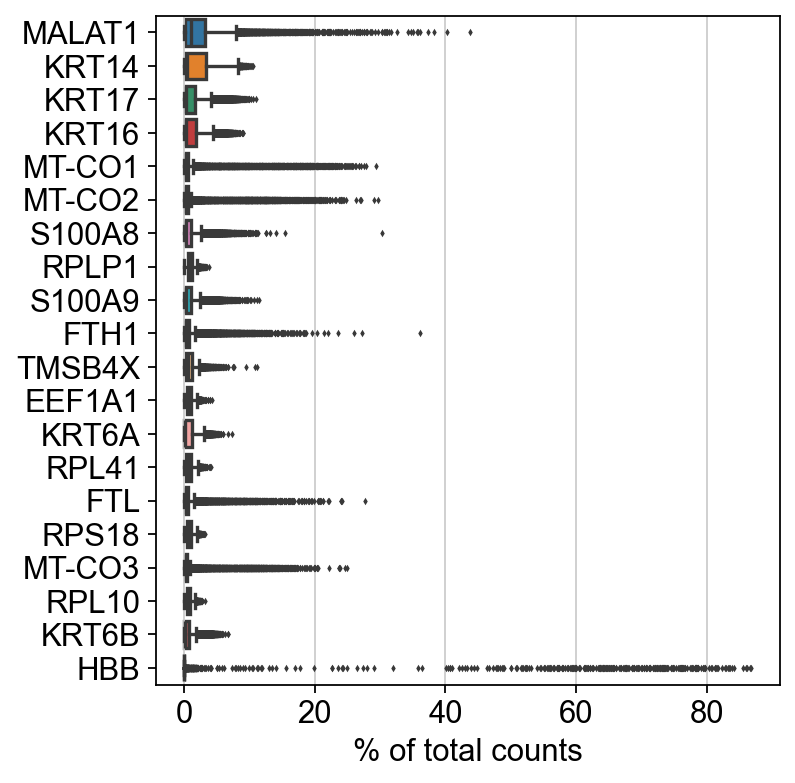

In [10]:
## 2.2 看基因在所有细胞中的表达情况
"""
    - 预期出现的基因类型,如 mitochondrial genes、actin、ribosomal protein 和 MALAT1。
    - 如果所有的外部控制转录本(spike-in transcripts)都在前50名中,可能意味着添加了过多的外部控制RNA。
    - 大量的伪基因或预测的基因可能暗示着在基因比对过程中可能存在问题。
"""
sc.pl.highest_expr_genes(adata, n_top=20)

 3.标准质控
- 3.1 读取经过环境RNA校正、基础过滤、双联体过滤后的数据
- 3.2 识别线粒体基因、核糖体基因、血红蛋白基因
- 3.3 计算QC指标
- 3.4 绘制QC指标
- 3.5 定义离群值函数
- 3.6 检查一般参数的离群值mad=5
- 3.7 检查线粒体基因的离群值mad=3
- 3.8 过滤
- 3.9 QC可视化
- 3.10 可选：手动质控
- 3.11 保存

In [11]:
## 3.2 识别线粒体基因、核糖体基因、血红蛋白基因
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))

In [12]:
## 3.3 计算QC指标
"""The three QC covariates:
    - total_counts: 库大小，过大的库可能是两个细胞的混合物
    - pct_counts_mt: 线粒体计数百分比
    - n_gene_by_counts: 细胞中至少有 1 个计数的基因数量
    -------------------------------
    如果一个细胞正在死亡,那么其mRNA被释放到内环境,导致线粒体基因的比例较高。
    但是,线粒体计数相对较高的细胞可能参与呼吸过程,不应被过滤掉。
    计数低或高的细胞可能对应于静止细胞群或尺寸较大的细胞。
    故我们在过滤低质量细胞的时候要同时考虑不同的QC协变量之间的关系。
    -------------------------------
    TODO:calculate_qc_metrics() inplace=True,注意第一个质控绘图的变化,可能数据已经被标准化了
"""
sc.pp.calculate_qc_metrics(
    # pp is preprocessing
    adata,
    qc_vars=["mt", "ribo", "hb"],
    inplace=True,  # False，则返回计算的指标作为 Pandas DataFrame。True，则将指标直接存储在输入的 AnnData 对象中，并不返回任何值。
    percent_top=(50, 100, 200, 500),  # 默认值
    log1p=True,
)
adata

AnnData object with n_obs × n_vars = 30852 × 22164
    obs: 'Barcode', 'batch', 'sample', 'group', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'feature_types', 'genome', 'gene_names', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a fu

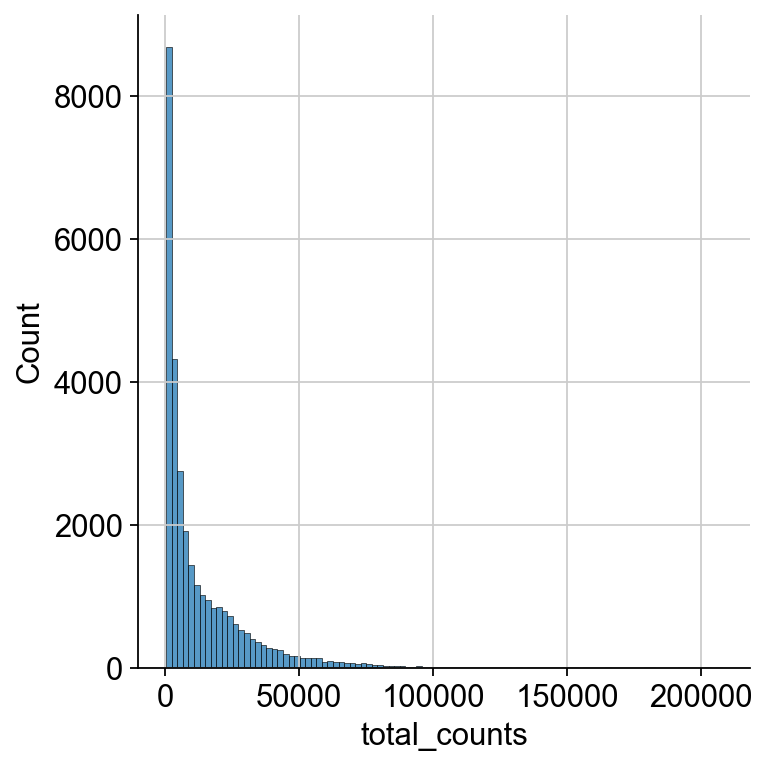

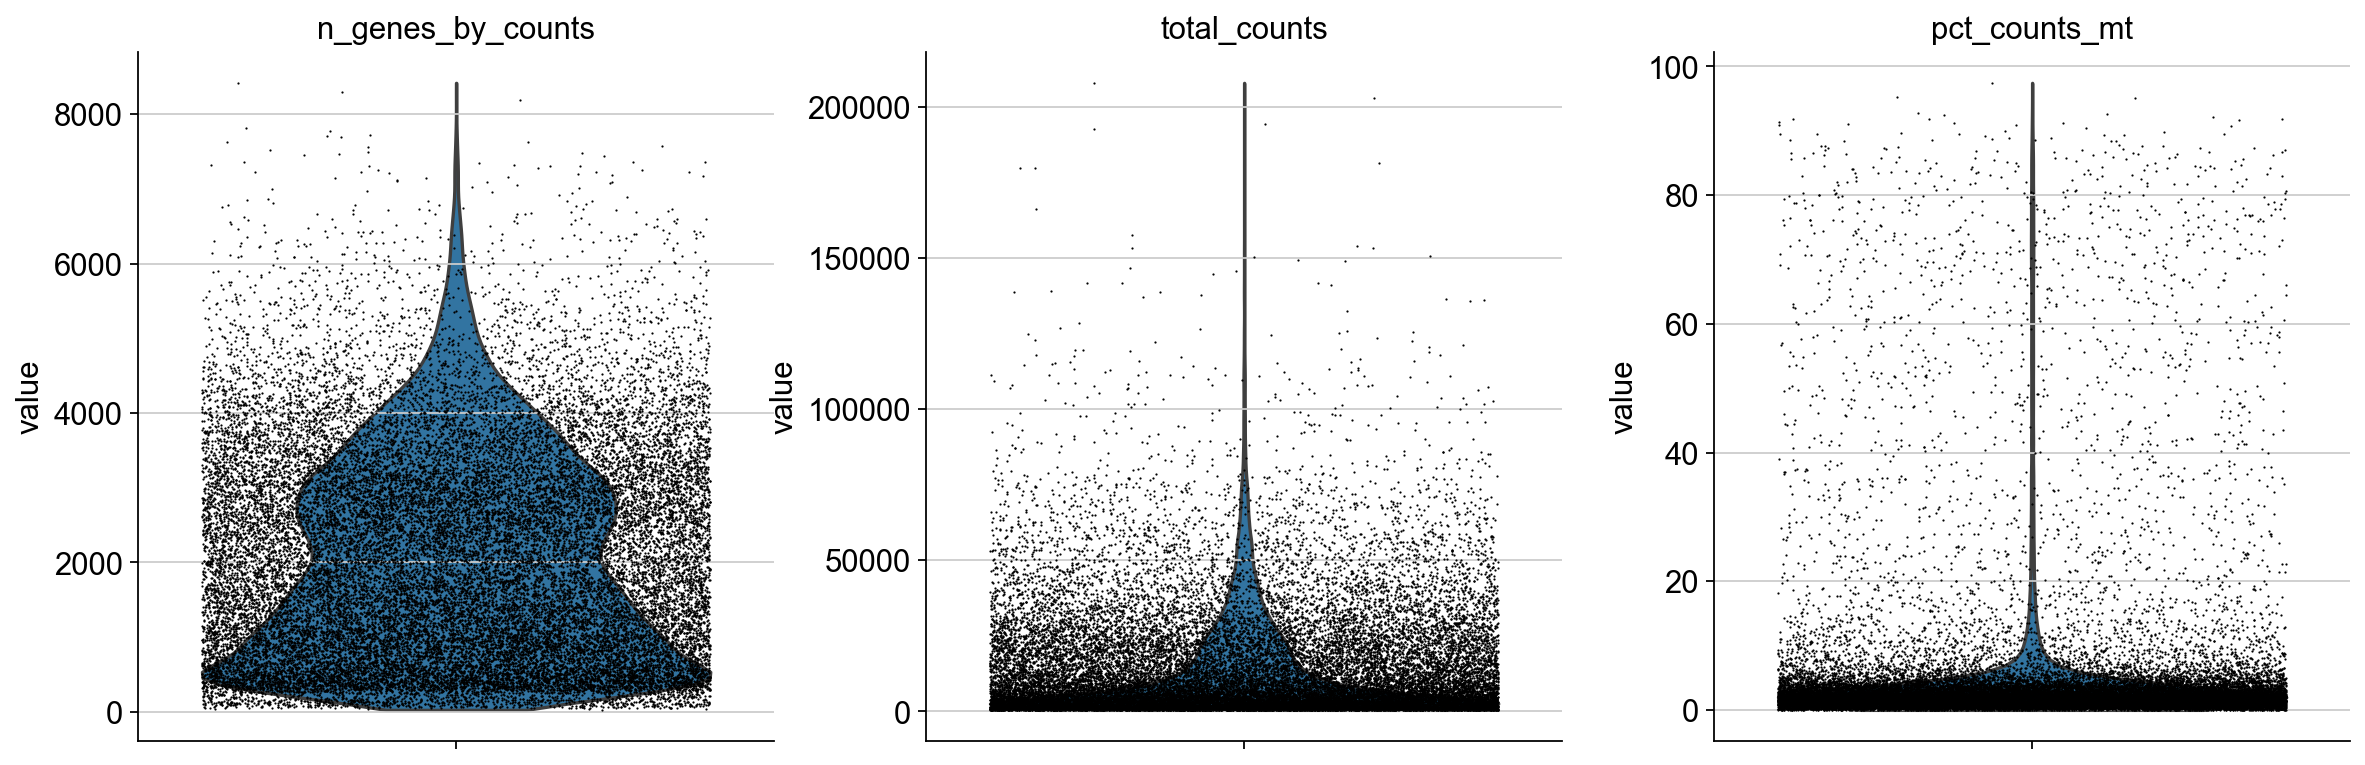

/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:315: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(adata.obs[key]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_utils.py:714: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


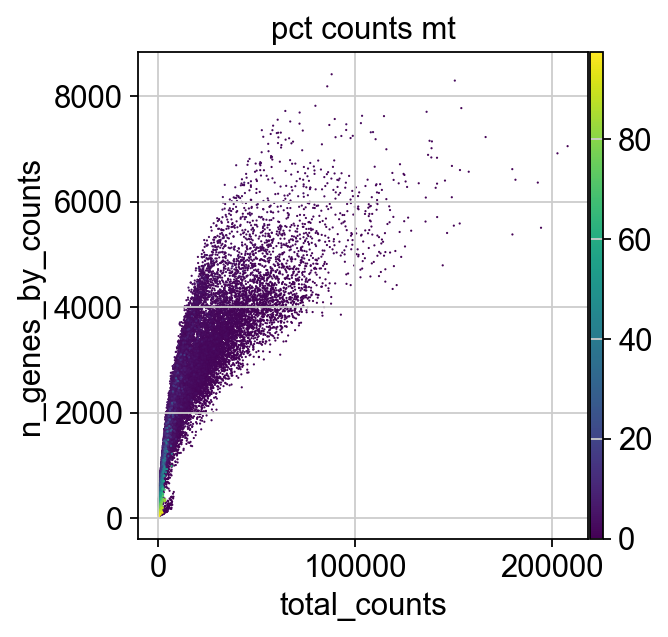

/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:315: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(adata.obs[key]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_utils.py:714: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


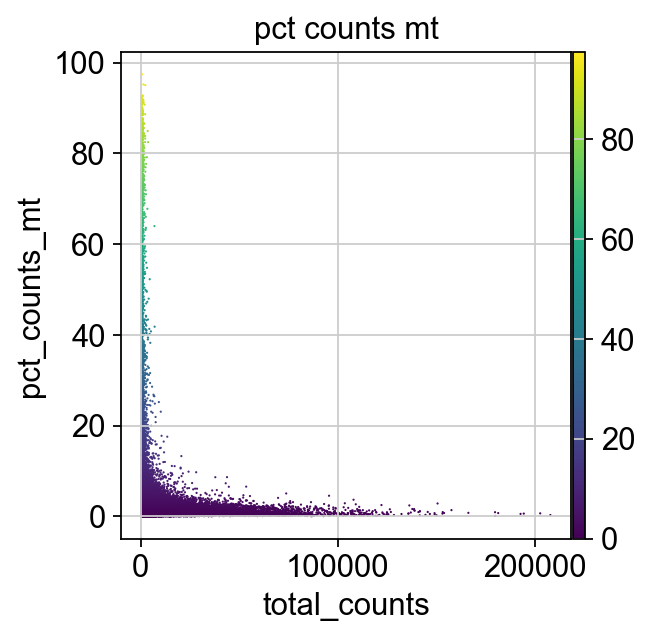

In [13]:
## 3.4 绘制QC指标
p1 = sns.displot(adata.obs["total_counts"], bins=100, kde=False)
p2 = sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
# 画的有些多余
p3 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")
p4 = sc.pl.scatter(adata, "total_counts", "pct_counts_mt", color="pct_counts_mt")

In [14]:
# ## 3.5 定义离群值函数
# import numpy as np
# from scipy.stats import median_abs_deviation
# def is_outlier(adata, metric: str, nmads: int):
#     """
#     Determines if a data point is an outlier

#     Parameters:
#         adata (AnnData): The annotated data object.
#         metric (str): The name of the metric used to determine outliers.
#         nmads (int): The number of median absolute deviations used to define outliers.

#     Returns:
#         outlier (bool): A boolean array indicating whether each data point is an outlier.
#     """

#     m_metric = adata.obs[metric]
#     outlier = (
#         m_metric < np.median(m_metric) - nmads * median_abs_deviation(m_metric)
#     ) | (np.median(m_metric) + nmads * median_abs_deviation(m_metric) < m_metric)
#     return outlier

In [15]:
## 3.5 定义离群值函数多批次版
import numpy as np
from scipy.stats import median_abs_deviation
import pandas as pd

def is_outlier_multibatch(adata, metric: str, nmads: int, batch_key: str):
    """
    Determines if a data point is an outlier within each batch.

    Parameters:
        adata (AnnData): The annotated data object.
        metric (str): The name of the metric used to determine outliers.
        nmads (int): The number of median absolute deviations used to define outliers.
        batch_key (str): The key in adata.obs used to define batches.

    Returns:
        outlier (pd.Series): A boolean array indicating whether each data point is an outlier within its batch.
    """

    # Get metric values and batch labels
    m_metric = adata.obs[metric]
    batches = adata.obs[batch_key]

    # Initialize an empty series to store outlier status for each data point
    outlier = pd.Series(index=m_metric.index, dtype=bool)

    # Loop over each batch to calculate outliers
    for batch in batches.unique():
        batch_idx = batches == batch
        batch_data = m_metric[batch_idx]

        # Calculate outlier status for this batch
        outlier_batch = (
            batch_data
            < np.median(batch_data) - nmads * median_abs_deviation(batch_data)
        ) | (
            np.median(batch_data) + nmads * median_abs_deviation(batch_data)
            < batch_data
        )

        # Store results in the main outlier series
        outlier[batch_idx] = outlier_batch

    return outlier

In [16]:
## 3.6 检查一般参数的离群值mad=5,更严格的参数mad=3，2
# adata.obs["outlier"] = (
#     is_outlier(adata, "log1p_total_counts", 3)
#     | is_outlier(adata, "log1p_n_genes_by_counts", 3)
#     | is_outlier(adata, "pct_counts_in_top_50_genes", 3)
#     | is_outlier(adata, "pct_counts_in_top_100_genes", 3)
#     | is_outlier(adata, "pct_counts_in_top_200_genes", 3)
#     | is_outlier(adata, "pct_counts_in_top_500_genes", 3)
    
# )

adata.obs["outlier"] = (
    is_outlier_multibatch(adata, "log1p_total_counts", 2, "batch")
    | is_outlier_multibatch(adata, "log1p_n_genes_by_counts", 2, "batch")
    | is_outlier_multibatch(adata, "pct_counts_in_top_50_genes", 2, "batch")
    | is_outlier_multibatch(adata, "pct_counts_in_top_100_genes", 2, "batch")
    | is_outlier_multibatch(adata, "pct_counts_in_top_200_genes", 2, "batch")
    | is_outlier_multibatch(adata, "pct_counts_in_top_500_genes", 2, "batch")
)

adata.obs.outlier.value_counts()

/tmp/ipykernel_2135169/1626808413.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[True False False ... False False False]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  outlier[batch_idx] = outlier_batch
/tmp/ipykernel_2135169/1626808413.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[True False False ... False False False]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  outlier[batch_idx] = outlier_batch
/tmp/ipykernel_2135169/1626808413.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False True False ... False False False]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  outlier[batch_idx] = outlier_batch
/tmp/ipykernel_2135169/16268

outlier
False    18918
True     11934
Name: count, dtype: int64

In [17]:
## 3.7 检查线粒体基因的离群值mad=3
# adata.obs["mt_outlier"] = is_outlier(adata, "pct_counts_mt", 3) | (
#     adata.obs["pct_counts_mt"] > 20
# )

adata.obs["mt_outlier"] = is_outlier_multibatch(adata, "pct_counts_mt", 3, "batch") | (
    adata.obs["pct_counts_mt"] > 20
)
adata.obs.mt_outlier.value_counts()

/tmp/ipykernel_2135169/1626808413.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[True False False ... False False False]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  outlier[batch_idx] = outlier_batch


mt_outlier
False    26265
True      4587
Name: count, dtype: int64

In [18]:
## 3.8 过滤
print(f"Total number of cells: {adata.n_obs}")
# python 的~是取反
adata.obs["discard"] = adata.obs.outlier | adata.obs.mt_outlier
#备份
unfiltered = adata.copy()
adata = adata[~adata.obs.discard].copy()
print(f"Number of cells after filtering of low quality cells: {adata.n_obs}")

Total number of cells: 30852


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


Number of cells after filtering of low quality cells: 17818


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

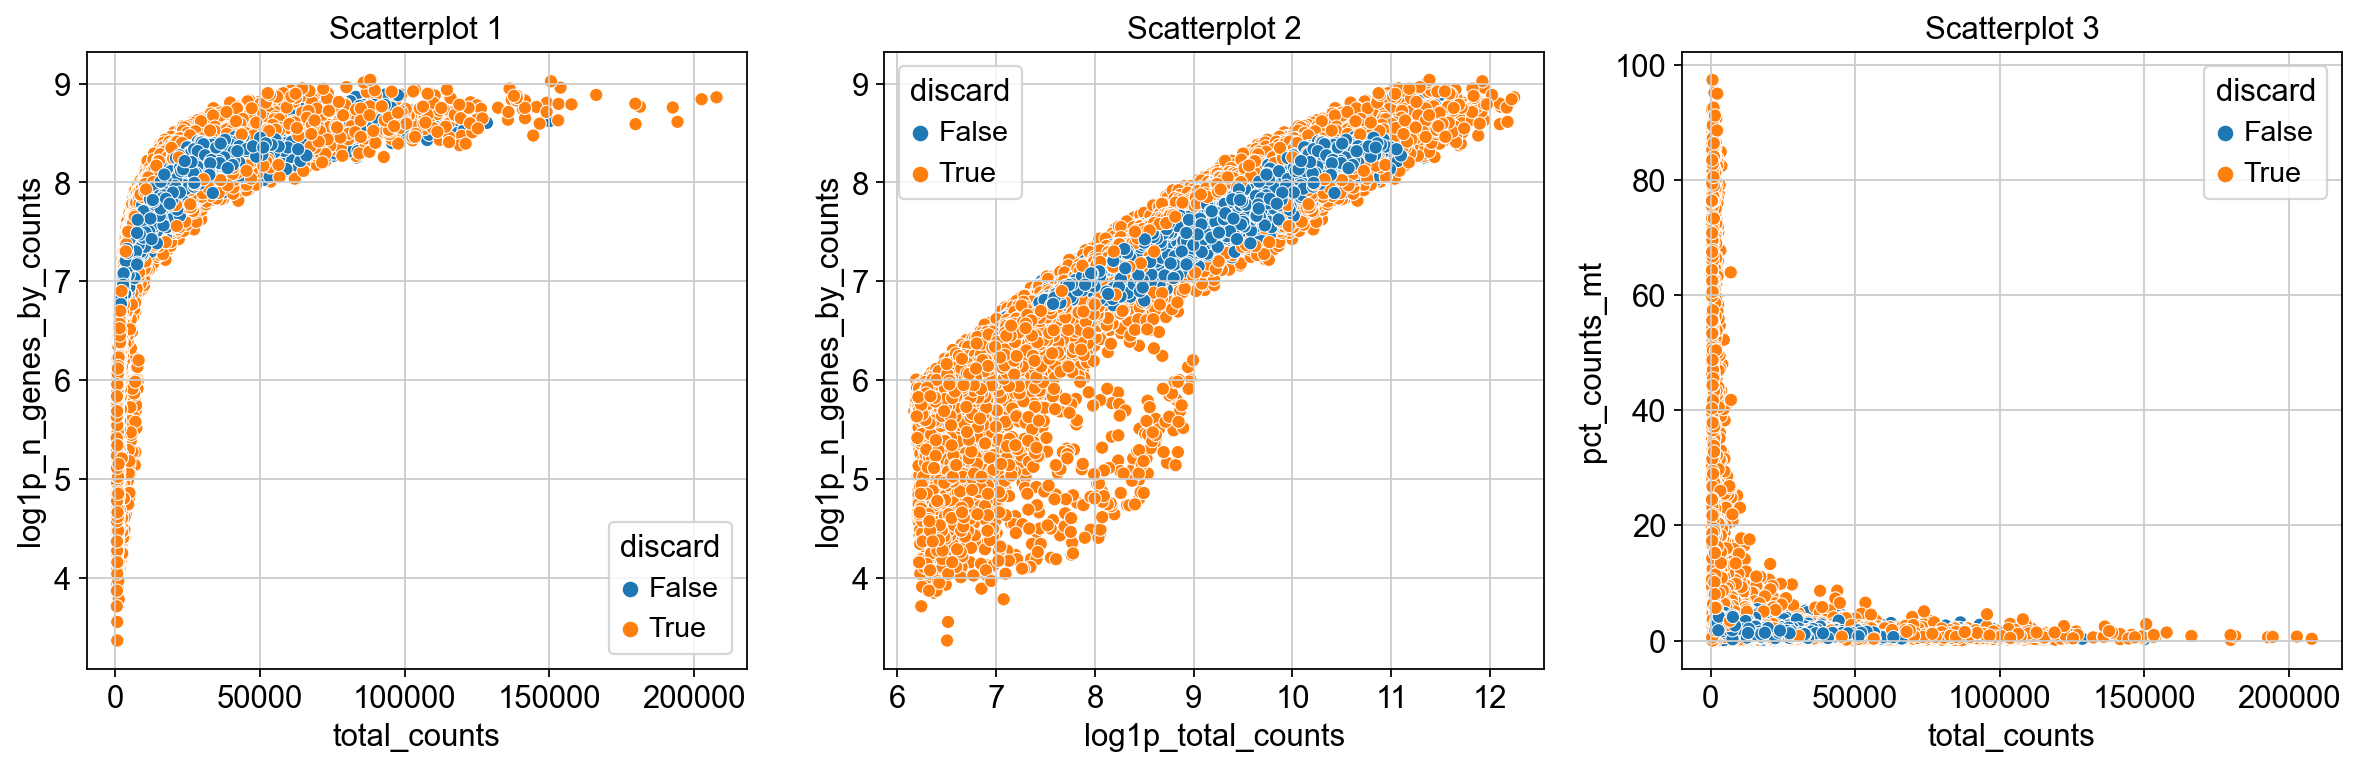

In [19]:
## 3.9 QC可视化
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x='total_counts', y='log1p_n_genes_by_counts', hue='discard', data=unfiltered.obs, ax=axes[0])
axes[0].set_title('Scatterplot 1')

sns.scatterplot(x='log1p_total_counts', y='log1p_n_genes_by_counts', hue='discard', data=unfiltered.obs, ax=axes[1])
axes[1].set_title('Scatterplot 2')

sns.scatterplot(x="total_counts", y="pct_counts_mt", hue="discard", data=unfiltered.obs, ax=axes[2])
axes[2].set_title('Scatterplot 3')

plt.tight_layout() # 自动调整子图参数，使之填充整个图像区域
plt.savefig('figures/01-质控-诊断图-py.pdf')

plt.show()
# 补充删失的细胞是否是有差异的诊断图参考bioconductor,见下方
# 

In [20]:
## 3.10 保存
adata.write("anndata_qc.h5ad", compression="gzip") # type: ignore

# 3.11 附加：拓展质控绘图和多批次质控

In [21]:
## 3.11.1 保存用于绘图已标记但未过滤的数据
unfiltered.write("unfiltered.h5ad", compression="gzip")  # type: ignore

In [22]:
## 3.11.2 配置R环境
import anndata2ri
import logging

import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

rcb.logger.setLevel(logging.CRITICAL)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

/tmp/ipykernel_2135169/3015148087.py:10: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [23]:
%%R
## 3.11.3 读取，scanpy转sce
library(SingleCellExperiment)
library(zellkonverter)
library(scater)

unfiltered <- readH5AD("unfiltered.h5ad")
counts(unfiltered)=assay(unfiltered,"X")
unfiltered


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

sh: 4: /home/fanxi/mambaforge/envs/lang/etc/conda/deactivate.d/deactivate-r-base.sh: [[: not found


class: SingleCellExperiment 
dim: 22164 30852 
metadata(0):
assays(2): X counts
rownames(22164): FAM138A OR4F5 ... AC213203.1 FAM231C
rowData names(13): gene_ids feature_types ... total_counts
  log1p_total_counts
colnames(30852): AAACCTGAGCGCCTCA-1_GSM7008851_diab19.h5
  AAACCTGAGGCGTACA-1_GSM7008851_diab19.h5 ...
  TTTGTCATCTACCTGC-1_GSM7008846_diab7.h5
  TTTGTCATCTCTGTCG-1_GSM7008846_diab7.h5
colData names(24): Barcode batch ... mt_outlier discard
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


Loading required package: SummarizedExperiment
Loading required package: MatrixGenerics
Loading required package: matrixStats

Attaching package: ‘MatrixGenerics’

The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, ro

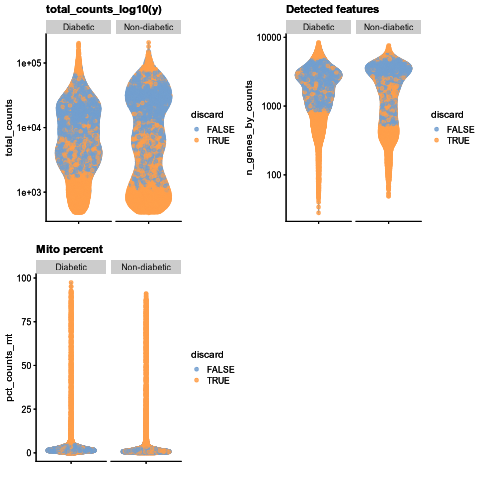

In [24]:
%%R
## 3.11.4
# 诊断图1 ---------------------------------------------------------------
qc_p1 <- gridExtra::grid.arrange(
    plotColData(unfiltered,
        y = "total_counts", colour_by = "discard",
        other_fields = "group"
    ) +
        scale_y_log10() +
        ggtitle("total_counts_log10(y)") + facet_wrap(~group),
    plotColData(unfiltered,
        y = "n_genes_by_counts", colour_by = "discard",
        other_fields = "group"
    ) +
        scale_y_log10() +
        ggtitle("Detected features") + facet_wrap(~group),
    plotColData(unfiltered,
        y = "pct_counts_mt", colour_by = "discard",
        other_fields = "group"
    ) +
        ggtitle("Mito percent") + facet_wrap(~group),
    ncol = 2
)
grid::grid.draw(qc_p1)
ggsave("./figures/01-质控-诊断图-R-1.pdf", qc_p1, width = 10, height = 5)



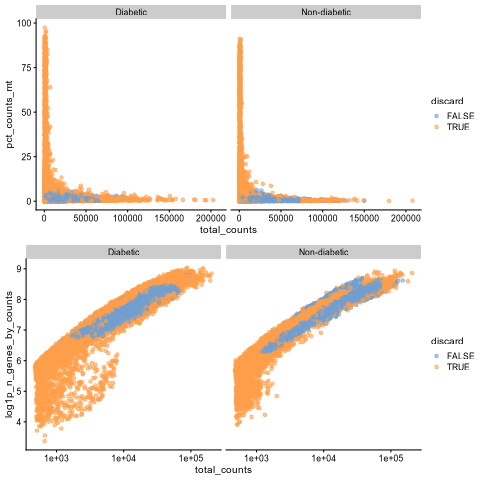

In [25]:
%%R
## 3.11.5
# 诊断图2 ---------------------------------------------------------------
# 还有一些可以画的图，使用a = colData(unfiltered) |> as.data.frame()—>ggplot()
## 确认不存在总计数和线粒体计数都较大的细胞
qc_p2 <- gridExtra::grid.arrange(
    plotColData(unfiltered,
        x = "total_counts", y = "pct_counts_mt",
        colour_by = "discard", other_fields = "group"
    ) + facet_wrap(~group),

    ### 好的细胞通常会表现为每个细胞有更多的基因和更高数量的UMI。
    plotColData(unfiltered,
        x = "total_counts", y = "log1p_n_genes_by_counts",
        colour_by = "discard", other_fields = c("group", "pct_counts_mt")
    ) + facet_wrap(~group) + scale_x_log10()
)

ggsave("./figures/01-质控-诊断图-R-2.pdf", qc_p2, width = 10, height = 5)


In [26]:
%%R
## 3.11.6
# 诊断图3:诊断细胞类型丢失 ---------------------------------------------------------------
## 看有没有去除有意义的细胞类型

discard <- unfiltered$discard
lost <- calculateAverage(counts(unfiltered)[, discard])
kept <- calculateAverage(counts(unfiltered)[, !discard])
## diagnose cell type loss by looking for systematic differences
library(edgeR)
logged <- cpm(cbind(lost, kept), log = TRUE, prior.count = 2)
log_fc <- logged[, 1] - logged[, 2]
abundance <- rowMeans(logged)

## 如果丢弃的池中某种细胞类型富集，我们应该观察到相应标记基因的表达增加
pdf("./figures/01-质控-诊断图-R-3.pdf", width = 5, height = 5)
plot(abundance, log_fc,
    xlab = "Average count", ylab = "Log-FC (lost/kept)",
    pch = 16
)
points(abundance[discard], log_fc[discard], col = "dodgerblue", pch = 16)
dev.off()


png 
  2 


Loading required package: limma

Attaching package: ‘limma’

The following object is masked from ‘package:scater’:

    plotMDS

The following object is masked from ‘package:BiocGenerics’:

    plotMA


Attaching package: ‘edgeR’

The following object is masked from ‘package:SingleCellExperiment’:

    cpm




Attaching package: ‘dplyr’

The following object is masked from ‘package:Biobase’:

    combine

The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union

The following object is masked from ‘package:GenomeInfoDb’:

    intersect

The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union

The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union

The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union

The following object is masked from ‘package:matrixStats’:

    count

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



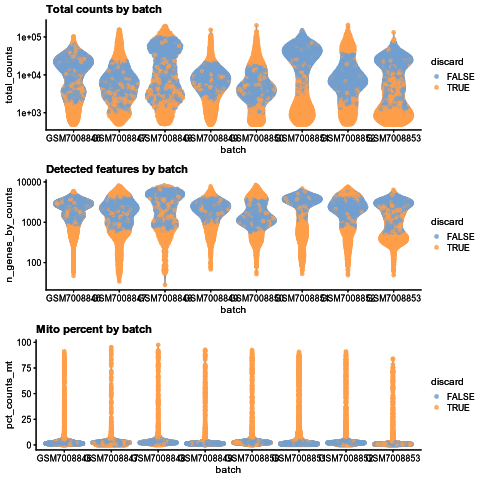

In [27]:
%%R
# 3.11.7 借助多样本质控
# 一般的质控基于大多数细胞都是正常的假设，但有时候不是
# 有spike gene添加时适合看这个
library(scater)
library(dplyr)

## 看要不要重新计算了离群值探索

# discard_mult_mt <- isOutlier(unfiltered$pct_counts_mt,
#     type = "higher", batch = unfiltered$batch #根据各自批次的离群值
# )
# discard_mult_counts <- isOutlier(unfiltered$total_counts,
#     type = "both", batch = unfiltered$batch
# )
# discard_mult_umi <- isOutlier(unfiltered$n_genes_by_counts,
#     type = "both", batch = unfiltered$batch
# )

# discard_mult <- discard_mult_mt | discard_mult_counts | discard_mult_umi

qc_p4 <- gridExtra::grid.arrange(
    plotColData(unfiltered,
        x = "batch", y = "total_counts",colour_by = "discard"
    ) + scale_y_log10() + ggtitle("Total counts by batch"),
    plotColData(unfiltered,
        x = "batch", y = "n_genes_by_counts",colour_by = "discard"
    ) + scale_y_log10() + ggtitle("Detected features by batch"),
    plotColData(unfiltered,
        x = "batch", y = "pct_counts_mt",colour_by = "discard"
    ) + ggtitle("Mito percent by batch")
    ,
    ncol = 1
)
grid::grid.draw(qc_p4)
ggsave("./figures/01-质控-诊断图-R-4-多批次.pdf",qc_p4, width = 10, height = 5)


- 看到这里的图应该回去调整参数
- 显著的双峰问题没解决，可以粗暴的设置上限，但是下面有正经的双峰